In [1]:
# Standard imports and plotting libs
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval.l2_space import L2Space
from pygeoinf.interval.function_providers import FourierFunctionProvider
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
# Import the profiler module we just added
from pygeoinf.interval.profiling.gram_integration_profiler import (
    geometric_range,
    run_profiling,
    plot_time_vs_npoints
)

In [2]:
# Problem setup: domain, space and a provider for test functions
function_domain = IntervalDomain(0, 1)
M = L2Space(10, function_domain)
provider = FourierFunctionProvider(M)

In [3]:
# Profiling parameters (we do NOT build the full Gram matrix here)
methods = ['simpson', 'trapz']
n_points_list = geometric_range(10, 2000, steps=8)
vectorized = True
N_functions = 8
repeats = 3
save_prefix = 'profile_gram_matrix'

Collected records: 384


,function_index,method,n_points,vectorized,run,time_s,result
0,0,simpson,10,True,0,0.000546,1.000000
1,1,simpson,10,True,0,0.000316,0.987354
2,2,simpson,10,True,0,0.000266,1.012646
3,3,simpson,10,True,0,0.000217,0.930326
4,4,simpson,10,True,0,0.000308,1.069674


,method,n_points,mean,std,count
0,simpson,10,0.000218,0.000083,24
1,simpson,21,0.000175,0.000036,24
2,simpson,45,0.000130,0.000014,24
3,simpson,97,0.000123,0.000016,24
4,simpson,206,0.000183,0.000029,24


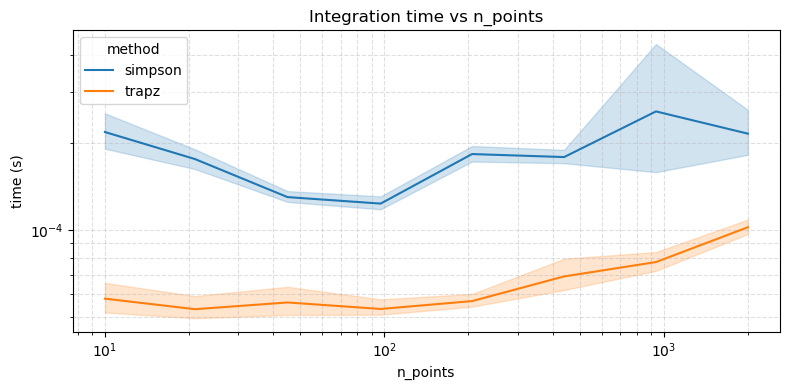

In [4]:
# Run the profiler and save results
df, summary = run_profiling(function_domain, provider, N_functions, methods, n_points_list, repeats=repeats, vectorized=vectorized, save_prefix=save_prefix)
print('Collected records:', len(df))
display(df.head())
display(summary.head())
# Quick plot
plot_time_vs_npoints(df)